# <span style="color:#0b486b">Deep Neural Networks</span>

## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 25 points]<span></div>

In the second part of this assignment, we are going to work with the FashionMNIST dataset for image recognition task. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.manual_seed(1234)

**Load the Fashion MNIST using `torchvision`**

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset_orgin = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

train_dataset_orgin.data = train_dataset_orgin.data.view(-1, 28*28)
test_dataset.data = test_dataset.data.view(-1, 28*28)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

N = len(train_dataset_orgin)
print(f"Number of training samples: {N}")
N_train = int(0.9*N)
N_val = N - N_train
print(f"Number of training samples: {N_train}")
print(f"Number of validation samples: {N_val}")

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset_orgin, [N_train, N_val])


train_loader = DataLoader(dataset=train_dataset_orgin, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 26421880/26421880 [00:06<00:00, 3865867.49it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305660.34it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5564394.42it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14280606.48it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])
Number of training samples: 60000
Number of training samples: 54000
Number of validation samples: 6000


####  <span style="color:red">**Question 2.1:**</span> Write the code to visualize a mini-batch in `train_loader` including its images and labels.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np


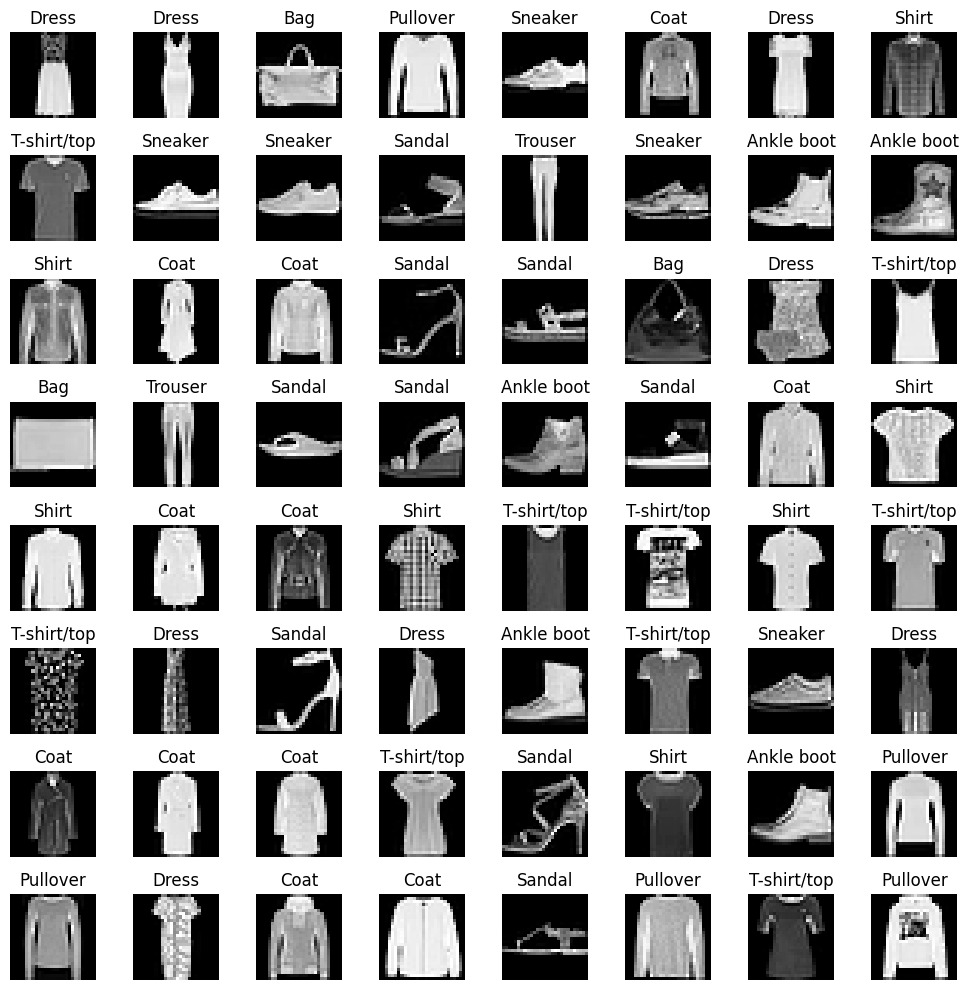

In [ ]:
data_iter = iter(train_loader)
images, labels = next(data_iter)  # Get the next batch

# Reshape images back to their original shape (28x28) for visualization
images = images.view(-1, 28, 28)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Define a function to show images in a grid with their class names
def show_images(images, labels):
    fig, axes = plt.subplots(8, 8, figsize=(10, 10))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        img = img.numpy()  # Convert to numpy array for visualization
        ax.imshow(img, cmap='gray')
        ax.set_title(f'{class_names[label.item()]}')  # Show class name
        ax.axis('off')

    plt.tight_lawet()
    plt.show()

# Visualize the first mini-batch
show_images(images[:64], labels[:64])


####<span style="color:red">**Question 2.2:**</span> Write the code for the feed-forward neural net using PyTorch

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
class FeedforwardNeuralNet(torch.nn.Module):
    def __init__(self):
        super(FeedforwardNeuralNet, self).__init__()
        self.fc1 = torch.nn.Linear(784, 40)
        self.fc2 = torch.nn.Linear(40, 30)
        self.fc3 = torch.nn.Linear(30, 10)
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

We now develop a feed-forward neural network with the architecture $784 \rightarrow 40(ReLU) \rightarrow 30(ReLU) \rightarrow 10(softmax)$. We can choose wer own way to implement wer network and an optimizer of interest. We should train model in $50$ epochs and evaluate the trained model on the test set.

####  <span style="color:red">**Question 2.3:**</span> Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


Assume that we need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that we can freely choose the optimizer and learning rate of interest for this task.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

# Define a class for the feedforward neural network
class FeedforwardNeuralNet(nn.Module):
    def __init__(self, n1, n2, act_func):
        super(FeedforwardNeuralNet, self).__init__()
        self.n1 = n1
        self.n2 = n2
        self.act_func = act_func

        # Choose activation function
        if act_func == 'relu':
            activation = nn.ReLU()
        elif act_func == 'sigmoid':
            activation = nn.Sigmoid()
        elif act_func == 'tanh':
            activation = nn.Tanh()
        else:
            raise ValueError("Unsupported activation function")

        # Define the model architecture
        self.model = nn.Sequential(
            nn.Linear(784, n1),
            activation,
            nn.Linear(n1, n2),
            activation,
            nn.Linear(n2, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input tensor
        return self.model(x)

# Define the training function
def train_model(model, train_loader, val_loader, epochs=20, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {accuracy}%")

    return accuracy


# Define the hyperparameter grid
n1_values = [20, 40]
n2_values = [20, 40]
activation_functions = ['relu', 'sigmoid', 'tanh']

# Perform grid search
best_accuracy = 0
best_params = {}



for n1 in n1_values:
    for n2 in n2_values:
        for act_func in activation_functions:
            print(f"Testing model with n1={n1}, n2={n2}, activation={act_func}")
            model = FeedforwardNeuralNet(n1, n2, act_func)
            accuracy = train_model(model, train_loader, val_loader, epochs=5, lr=0.001)
            print(f"Accuracy: {accuracy}%")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n1': n1, 'n2': n2, 'activation': act_func}

print(f"Best Accuracy: {best_accuracy}% with parameters: {best_params}")



Testing model with n1=20, n2=20, activation=relu
Epoch 1/5, Loss: 1.7505612054359176, Accuracy: 81.3%
Epoch 2/5, Loss: 1.6386067161936242, Accuracy: 81.93333333333334%
Epoch 3/5, Loss: 1.6232169669574257, Accuracy: 83.75%
Epoch 4/5, Loss: 1.614269382918059, Accuracy: 84.83333333333333%
Epoch 5/5, Loss: 1.609946015165813, Accuracy: 85.41666666666667%
Accuracy: 85.41666666666667%
Testing model with n1=20, n2=20, activation=sigmoid
Epoch 1/5, Loss: 2.046345054467858, Accuracy: 72.95%
Epoch 2/5, Loss: 1.723550461502726, Accuracy: 79.0%
Epoch 3/5, Loss: 1.6696481467055868, Accuracy: 80.35%
Epoch 4/5, Loss: 1.6562886145323323, Accuracy: 80.76666666666667%
Epoch 5/5, Loss: 1.6500380171387434, Accuracy: 81.21666666666667%
Accuracy: 81.21666666666667%
Testing model with n1=20, n2=20, activation=tanh
Epoch 1/5, Loss: 1.7724337457085468, Accuracy: 80.83333333333333%
Epoch 2/5, Loss: 1.6356262465529858, Accuracy: 83.33333333333333%
Epoch 3/5, Loss: 1.6191815252243074, Accuracy: 84.6%
Epoch 4/5, Lo

####  <span style="color:red">**Question 2.4:**</span> Implement the loss with the form: $loss(p,y)=CE(1_{y},p)+\lambda H(p)$ where $H(p)=-\sum_{i=1}^{M}p_{i}\log p_{i}$ is the entropy of $p$, $p$ is the prediction probabilities of a data point $x$ with the ground-truth label $y$, $1_y$ is an one-hot label, and $\lambda >0$ is a trade-off parameter. Set $\lambda = 0.1$ to train a model.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomLoss(nn.Module):
    def __init__(self, lambda_param=0.1):
        super(CustomLoss, self).__init__()
        self.lambda_param = lambda_param
        self.cross_entropy = nn.CrossEntropyLoss()

    def forward(self, outputs, targets):
        # Convert targets to one-hot encoding
        targets_one_hot = F.one_hot(targets, num_classes=outputs.size(1)).float()

        # Cross-entropy loss
        ce_loss = self.cross_entropy(outputs, targets)

        # Calculate the probabilities from outputs (softmax)
        probabilities = F.softmax(outputs, dim=1)

        # Entropy loss
        entropy_loss = -torch.sum(probabilities * torch.log(probabilities + 1e-10), dim=1).mean()

        # Total loss
        total_loss = ce_loss + self.lambda_param * entropy_loss
        return total_loss

criterion = CustomLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epoch = 20
for epoch in range(num_epoch):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{20}, Loss: {running_loss/len(train_loader)}, Accuracy: {accuracy}%")

Epoch 1/20, Loss: 1.8179159018276596, Accuracy: 86.71666666666667%
Epoch 2/20, Loss: 1.8167178764272092, Accuracy: 87.43333333333334%
Epoch 3/20, Loss: 1.814463650493988, Accuracy: 87.56666666666666%
Epoch 4/20, Loss: 1.8107898137462672, Accuracy: 87.5%
Epoch 5/20, Loss: 1.8080315019276096, Accuracy: 86.98333333333333%
Epoch 6/20, Loss: 1.8088996869160423, Accuracy: 86.68333333333334%
Epoch 7/20, Loss: 1.8059237356633266, Accuracy: 87.66666666666667%
Epoch 8/20, Loss: 1.8076549748113668, Accuracy: 88.6%
Epoch 9/20, Loss: 1.8029917155755864, Accuracy: 87.83333333333333%
Epoch 10/20, Loss: 1.803001762961528, Accuracy: 87.4%
Epoch 11/20, Loss: 1.8011262987468288, Accuracy: 88.08333333333333%
Epoch 12/20, Loss: 1.8010646816509872, Accuracy: 87.73333333333333%
Epoch 13/20, Loss: 1.8013375526043907, Accuracy: 88.0%
Epoch 14/20, Loss: 1.7985881794490286, Accuracy: 88.61666666666666%
Epoch 15/20, Loss: 1.7980459437949825, Accuracy: 88.66666666666667%
Epoch 16/20, Loss: 1.7968297947698564, Accu

####  <span style="color:red">**Question 2.5:**</span> Experimenting with **sharpness-aware minimization** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Sharpness-aware minimization (SAM) (i.e., [link for main paper](https://openreview.net/pdf?id=6Tm1mposlrM) from Google Deepmind) is a simple yet but efficient technique to improve the generalization ability of deep learning models on unseen data examples. In wer research or wer work, we might potentially use this idea. Wer task is to read the paper and implement *Sharpness-aware minimization (SAM)*. Finally, we need to apply SAM to the best architecture found in **Question 2.3**.   

In [ ]:
# Define the SAM optimizer
class SAM(optim.Optimizer):
    def __init__(self, params, base_optimizer, rho=0.05, **kwargs):
        defaults = dict(rho=rho, **kwargs)
        super(SAM, self).__init__(params, defaults)
        self.base_optimizer = base_optimizer

    def step(self, closure=None):
        loss = closure()
        if loss is None:
            raise ValueError("The closure function must return a loss value")

        # Update the model parameters
        self.base_optimizer.step()

        # Perturb parameters
        with torch.no_grad():
            for group in self.param_groups:
                for p in group['params']:
                    if p.grad is not None:
                        d_p = p.grad.data
                        p.add_(self.defaults['rho'], d_p)

        # Recompute loss
        loss = closure()

        # Reset parameters to their original values
        with torch.no_grad():
            for group in self.param_groups:
                for p in group['params']:
                    if p.grad is not None:
                        d_p = p.grad.data
                        p.sub_(2 * self.defaults['rho'], d_p)

        # Update parameters again
        self.base_optimizer.step()

        return loss


In [ ]:
base_optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = SAM(model.parameters(), base_optimizer, rho=0.05)



for epoch in range(20):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        def closure():
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            return loss

        loss = optimizer.step(closure)
        running_loss += loss.item()

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/20, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")


<ipython-input-8-4e8361b845a0>:23: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha = 1) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1581.)
  p.add_(self.defaults['rho'], d_p)


Epoch 1/20, Loss: 1.8251, Accuracy: 84.67%
Epoch 2/20, Loss: 1.8291, Accuracy: 84.18%
Epoch 3/20, Loss: 1.8289, Accuracy: 84.88%
Epoch 4/20, Loss: 1.8297, Accuracy: 85.38%
Epoch 5/20, Loss: 1.8251, Accuracy: 86.32%
Epoch 6/20, Loss: 1.8262, Accuracy: 85.88%
Epoch 7/20, Loss: 1.8256, Accuracy: 86.00%
Epoch 8/20, Loss: 1.8265, Accuracy: 85.27%
Epoch 9/20, Loss: 1.8251, Accuracy: 85.72%
Epoch 10/20, Loss: 1.8269, Accuracy: 85.90%
Epoch 11/20, Loss: 1.8263, Accuracy: 85.08%
Epoch 12/20, Loss: 1.8235, Accuracy: 86.38%
Epoch 13/20, Loss: 1.8228, Accuracy: 86.50%
Epoch 14/20, Loss: 1.8213, Accuracy: 85.23%
Epoch 15/20, Loss: 1.8257, Accuracy: 86.47%
Epoch 16/20, Loss: 1.8214, Accuracy: 85.33%
Epoch 17/20, Loss: 1.8201, Accuracy: 86.35%
Epoch 18/20, Loss: 1.8220, Accuracy: 86.02%
Epoch 19/20, Loss: 1.8169, Accuracy: 86.63%
Epoch 20/20, Loss: 1.8207, Accuracy: 86.55%
